# Presentation 1 - Part 1

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 6969526.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 206921.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2084297.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1031821.96it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.7181, Accuracy: 89.47%
Epoch 2/10, Loss: 0.6197, Accuracy: 89.79%
Epoch 3/10, Loss: 0.6581, Accuracy: 84.41%
Epoch 4/10, Loss: 0.6415, Accuracy: 84.71%
Epoch 5/10, Loss: 0.6329, Accuracy: 89.05%
Epoch 6/10, Loss: 0.6278, Accuracy: 89.49%
Epoch 7/10, Loss: 0.6336, Accuracy: 88.15%
Epoch 8/10, Loss: 0.6512, Accuracy: 86.37%
Epoch 9/10, Loss: 0.6599, Accuracy: 89.02%
Epoch 10/10, Loss: 0.6582, Accuracy: 83.89%


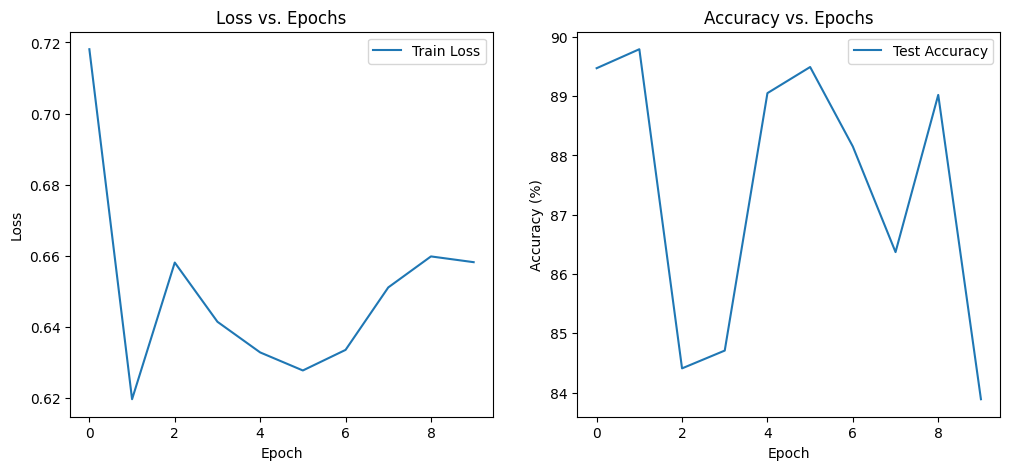

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters (students can modify these)
learning_rate = 0.01   # Learning rate
dropout_rate = 0.3     # Dropout rate
batch_size = 64        # Batch size
weight_decay = 0.0005  # L2 regularization (weight decay)
epochs = 10            # Number of training epochs

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, dropout_rate):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input images
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNN(dropout_rate).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Training loop
train_losses, test_accuracies = [], []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Store training loss
    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%')

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs. Epochs")

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs. Epochs")

plt.show()
